# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'2.0.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244913 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

/var/folders/7q/5kjp98215fjgwszmr0qgyr_m0000gn/T/ipykernel_60125/2196972783.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479487 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [30]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df
print(type(batman_df))

Total Batman Movies: 2
<class 'pandas.core.frame.DataFrame'>


### List all Batman movies ever made - the right approach

In [32]:
#batman_df = movies[movies.title.str.contains('Batman', case=False)]
#print('Total Batman Movies:', len(batman_df))
#batman_df.head(10)

#type(movies)
#type(movies.title)
#print(movies.title)

#for x in movies.title:
#    if x.find('Batman') >= 0:
#        print(x)


#batman title mask for movies series

batman_df = movies[movies.title.str.find('Batman') >= 0]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)



Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [33]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [38]:
harry_potter_df = movies[movies.title.str.find('Harry Potter') >= 0]
print('Total Harry Potter Movies:', len(harry_potter_df))
#print(harry_potter_df)

print(harry_potter_df.sort_values(by=['year'], ascending=False))

Total Harry Potter Movies: 8
                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


### How many movies were made in the year 2017?

In [39]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [40]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [48]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])



2779

### Section I - Q4: How many movies are titled "Hamlet"?

In [50]:
len(movies[movies.title == "Hamlet"])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [55]:
print(movies[(movies.title == "Hamlet") & (movies.year >= 2000)].sort_values(by=['year'], ascending=True))

         title  year
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [80]:
#cast.info()
#print(cast.head(10))
roles_df = cast[cast.title == "Inception"]
#print(roles_df.head(10))
#len(roles_df)
#print(roles_df.n.unique())
#len(roles_df.n.isnull())
roles_extra_df = roles_df[roles_df.n.isnull()]
print(len(roles_extra_df))
#print(roles_extra_df.head(10))

27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [89]:
#print(roles_df.n.unique())
main_roles_df = roles_df[roles_df.n > 0]
print(len(main_roles_df))
#print(main_roles_df)


51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [92]:
print(main_roles_df.sort_values(by=['n'], ascending=True).iloc[:10])

             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [95]:
cast_ad_df = cast[cast.character == "Albus Dumbledore"]
print(len(cast_ad_df))
print(cast_ad_df)


8
                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus 

In [102]:
# Part B
print(cast_ad_df.name.unique())



['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [110]:
cast_kr_df = cast[cast.name == "Keanu Reeves"]
print(len(cast_kr_df))
#print(cast_kr_df)


62


In [111]:
print(cast_kr_df[(cast_kr_df.n == 1) & (cast_kr_df.year >= 1999)].sort_values(by=['year'], ascending=True))

                                 title  year          name   type  \
1892390                     The Matrix  1999  Keanu Reeves  actor   
1892397               The Replacements  2000  Keanu Reeves  actor   
1892358                      Hard Ball  2001  Keanu Reeves  actor   
1892383                 Sweet November  2001  Keanu Reeves  actor   
1892348                    Constantine  2005  Keanu Reeves  actor   
1892388                 The Lake House  2006  Keanu Reeves  actor   
1892382                   Street Kings  2008  Keanu Reeves  actor   
1892385  The Day the Earth Stood Still  2008  Keanu Reeves  actor   
1892359                  Henry's Crime  2010  Keanu Reeves  actor   
1892342                       47 Ronin  2013  Keanu Reeves  actor   
1892361                      John Wick  2014  Keanu Reeves  actor   
1892366                    Knock Knock  2015  Keanu Reeves  actor   
1892399                The Whole Truth  2016  Keanu Reeves  actor   
1892362           John Wick: Chapt

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [117]:
len(cast[(cast.year >= 1950) & (cast.year <=1960)])   

234635

In [118]:
len(cast[(cast.year >= 2007) & (cast.year <=2017)])   

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [120]:
print(cast[(cast.year >= 2000) & (cast.n == 1)])

                          title  year              name     type  \
102      Live Freaky Die Freaky  2006           Nick 13    actor   
138       All Things Fall Apart  2011           50 Cent    actor   
144                 Freelancers  2012           50 Cent    actor   
145      Get Rich or Die Tryin'  2005           50 Cent    actor   
146                         Gun  2010           50 Cent    actor   
...                         ...   ...               ...      ...   
3785795                     120  2008       ?zge ?zberk  actress   
3785893                      6A  2016       Emine ?zkan  actress   
3785961                  Kadife  2012      Ayta? ?ztuna  actress   
3786008              Dig og mig  2008  Julie R. ?lgaard  actress   
3786011    Fortune Defies Death  2017  Julie R. ?lgaard  actress   

              character    n  
102      TV Reporter #1  1.0  
138                Deon  1.0  
144                Malo  1.0  
145              Marcus  1.0  
146                Rich  1.0

In [129]:
#(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

print(cast[(cast.year >= 2000) & (cast.n.notnull()) & (cast.n != 1)])

                                                     title  year  \
0                                           Closet Monster  2015   
2                                      Battle of the Sexes  2017   
8        Lapis, Ballpen at Diploma, a True to Life Journey  2014   
10                                 When the Man Went South  2014   
11                                 Little Angel (Angelita)  2015   
...                                                    ...   ...   
3786163                                  Beowulf & Grendel  2005   
3786164                                               Eden  2018   
3786169                   Niceland (Population. 1.000.002)  2004   
3786172                   Niceland (Population. 1.000.002)  2004   
3786174                                       U.S.S.S.S...  2003   

                                   name     type               character     n  
0                              Buffy #1    actor                 Buffy 4  31.0  
2                    

In [130]:
#(C) List the total number of support\extra-credit roles available from 2000 - present

print(cast[(cast.year >= 2000) & (cast.n.isnull())])

                          title  year                         name     type  \
3          Secret in Their Eyes  2015                      $hutter    actor   
4                    Steve Jobs  2015                      $hutter    actor   
5        Straight Outta Compton  2015                      $hutter    actor   
6        Straight Outta Compton  2015                      $hutter    actor   
7                For Thy Love 2  2009                 Bee Moe $lim    actor   
...                         ...   ...                          ...      ...   
3786159                Eldfjall  2011      Katla M. ?orgeirsd?ttir  actress   
3786160               Svanurinn  2017      Katla M. ?orgeirsd?ttir  actress   
3786166               Foreldrar  2007  Lilja Gu?r?n ?orvaldsd?ttir  actress   
3786167                 Rokland  2011  Lilja Gu?r?n ?orvaldsd?ttir  actress   
3786168                      XL  2013  Lilja Gu?r?n ?orvaldsd?ttir  actress   

                          character   n  
3        

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [131]:
top_ten = movies.title.value_counts()[:10]
top_ten

title
Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
The Three Musketeers    11
Othello                 11
Freedom                 11
Honeymoon               11
Name: count, dtype: int64

### Plot the top ten common movie names of all time

<Axes: ylabel='title'>

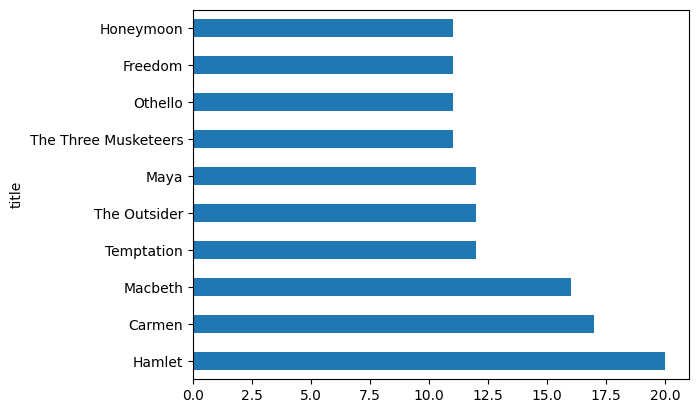

In [132]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [165]:
#release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
#release_dates.info()

release_dates_2000 = release_dates[release_dates.date.dt.year >= 2000]

top3_released = release_dates_2000['date'].dt.year.value_counts()[:3]


print(top3_released)

date
2016    18135
2015    17291
2017    17284
Name: count, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<Axes: xlabel='Decade'>

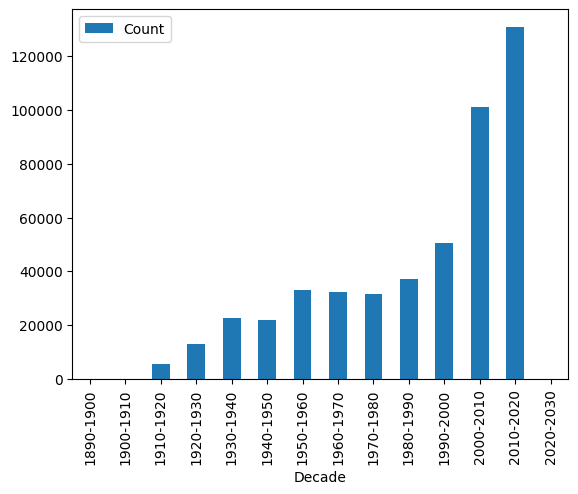

In [196]:
#print(release_dates[(release_dates.date.dt.year >= 1890) & (release_dates.date.dt.year < 1900)])

release_decade_df = {'Decade': [], 'Count': []}

for decade in range(1890, 2030, 10):
    fdecade = decade + 10
   # print(decade , fdecade, release_dates[(release_dates.date.dt.year >= decade) & (release_dates.date.dt.year < fdecade)].year.count())
    release_decade_df['Decade'].append(str(decade) + '-' + str(fdecade))
    release_decade_df['Count'].append(release_dates[(release_dates.date.dt.year >= decade) & (release_dates.date.dt.year < fdecade)].year.count())
    
toPlot = pd.DataFrame(release_decade_df)

toPlot.plot(kind='bar', x='Decade', y='Count')



### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [197]:
# (A) What are the top 10 most common character names in movie history?

print(cast.character.value_counts()[:10])

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: count, dtype: int64


In [198]:
# (B) Who are the top 10 people most often credited as "Herself" in movie history?

print(cast[cast.character == 'Herself'].name.value_counts()[:10])

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: count, dtype: int64


In [199]:
#(C) Who are the top 10 people most often credited as "Himself" in movie history?

print(cast[cast.character == 'Himself'].name.value_counts()[:10])

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: count, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [216]:
#(A) What are the top 10 most frequent roles that start with the word "Zombie"?

#print(cast[cast.character.str.startswith('Zombie')].character.value_counts()[:10])

print(cast[cast.character.str.startswith("Zombie") & cast.character.notnull()].character.value_counts()[:10])


character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: count, dtype: int64


In [217]:
# (B) What are the top 10 most frequent roles that start with the word "Police"?
print(cast[cast.character.str.startswith("Police") & cast.character.notnull()].character.value_counts()[:10])

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: count, dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<Axes: xlabel='year'>

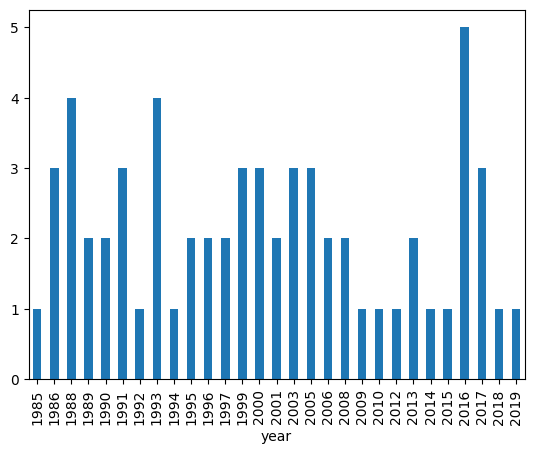

In [233]:
# Plot how many roles 'Keanu Reeves' has played in each year of his career.

cast[cast.name == 'Keanu Reeves'].year.value_counts().sort_index().plot(kind='bar')


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<Axes: xlabel='year', ylabel='n'>

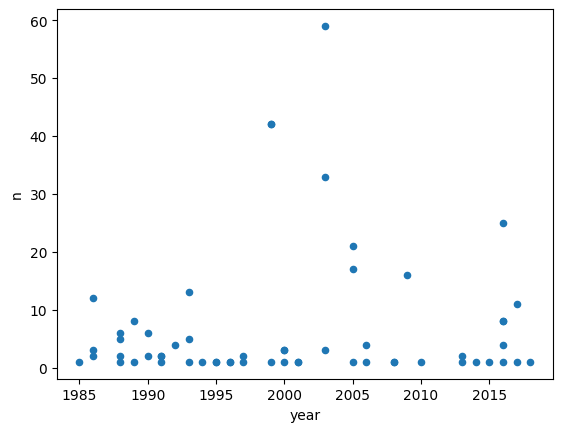

In [248]:
# Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.

#cast[cast.name == 'Keanu Reeves']

cast[cast.name == 'Keanu Reeves'].plot(kind='scatter', x='year', y='n')

#cast[cast.name == 'Keanu Reeves'].sort_values(by=['n'], ascending=True)

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<Axes: xlabel='Decade'>

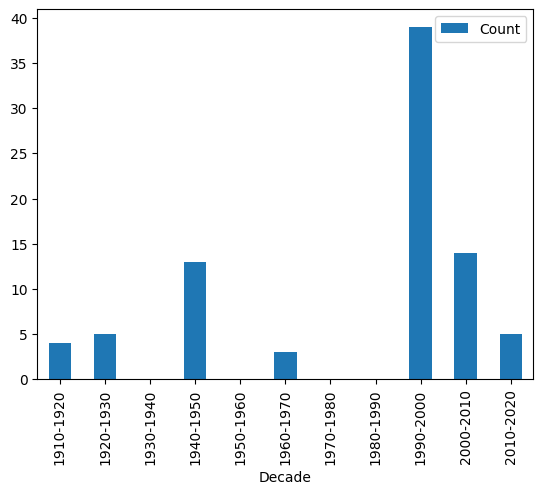

In [276]:
#  Plot the number of "Hamlet" films made by each decade
# print(release_dates[release_dates.title == 'Hamlet'].sort_values(by=['year'], ascending=True).head(1).year.values[0]) // first year movie was made
init_decade = release_dates[release_dates.title == 'Hamlet'].sort_values(by=['year'], ascending=True).head(1).year.values[0]
end_decade = release_dates[release_dates.title == 'Hamlet'].sort_values(by=['year'], ascending=False).head(1).year.values[0]

init_decade = round(init_decade/10)*10
end_decade = round(end_decade/10)*10

#print(init_decade, end_decade)

hamlet_df = {'Decade': [], 'Count': []}

for decade in range(init_decade, end_decade, 10):
    #print(str(decade) + ' : - ' + str(release_dates[(release_dates.title == 'Hamlet') & (release_dates.year >= decade) & (release_dates.year < decade + 10)].year.count()))
    hamlet_df['Decade'].append(str(decade) + '-' + str(decade + 10))
    hamlet_df['Count'].append(release_dates[(release_dates.title == 'Hamlet') & (release_dates.year >= decade) & (release_dates.year < decade + 10)].year.count())

hamlet_df = pd.DataFrame(hamlet_df)

hamlet_df.plot(kind='bar', x='Decade', y='Count')


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [277]:
#How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)? n = 1

print(cast[(cast.year >= 1960) & (cast.year <= 1969) & (cast.n == 1)].type.value_counts())

type
actor      8320
actress    3503
Name: count, dtype: int64


In [278]:
#How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)? n = 1 
print(cast[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n == 1)].type.value_counts())

type
actor      18557
actress     7787
Name: count, dtype: int64


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [296]:
# List, in order by year, each of the films in which Frank Oz has played more than 1 role. 

# print(cast[cast.name == 'Frank Oz'].title.value_counts()[cast[cast.name == 'Frank Oz'].title.value_counts() > 1])

#cast[cast.name == 'Frank Oz'].title.value_counts()

cast[cast.name == 'Frank Oz'].groupby(['year', 'title']).size()[cast[cast.name == 'Frank Oz'].groupby(['year', 'title']).size() > 1]


year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [300]:
#List each of the characters that Frank Oz has portrayed at least twice

#cast[cast.name == 'Frank Oz'].character.value_counts()

print(cast[cast.name == 'Frank Oz'].character.value_counts()[cast[cast.name == 'Frank Oz'].character.value_counts() > 1])

character
Miss Piggy        6
Yoda              6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: count, dtype: int64


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: xlabel='date'>

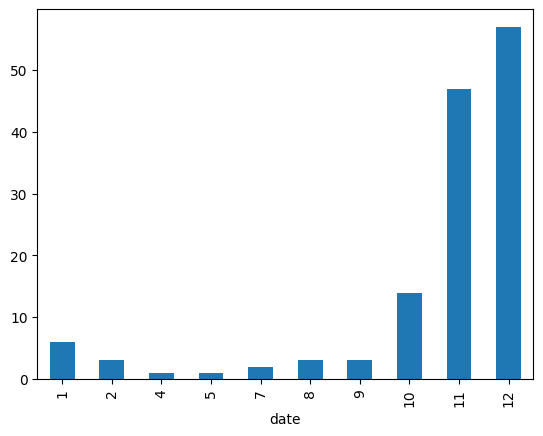

In [301]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: xlabel='date'>

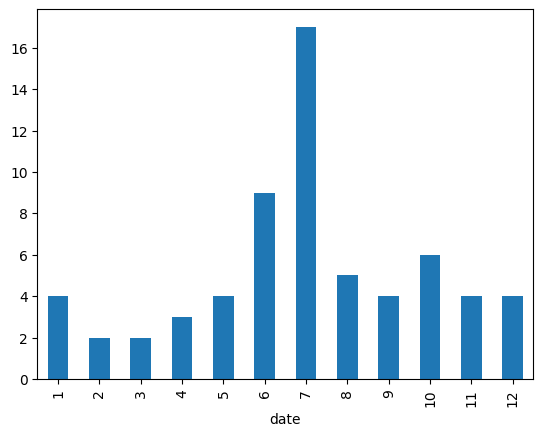

In [305]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<Axes: xlabel='date'>

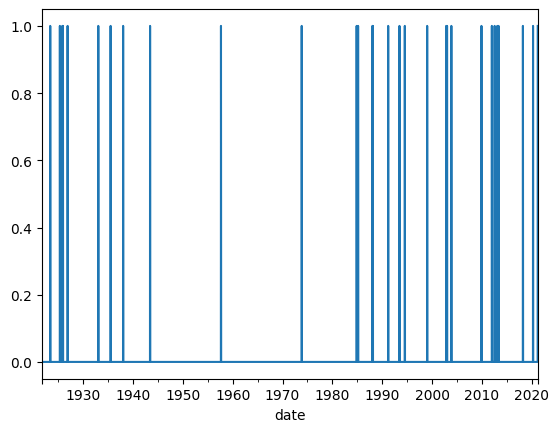

In [319]:
movies_action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')].sort_values(by=['date'], ascending=True).set_index('date')

#movies_action.info()

week_movies_action = movies_action.resample('W').size()

#week_movies_action.info()

#print(week_movies_action)
week_movies_action.plot()


### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [354]:
#cast.info()

#release_dates[release_dates.country == 'USA'].sort_values(by=['date'], ascending=True)

#cast_kr_df[cast_kr_df.n == 1].sort_values(by=['year'], ascending=True)

merged_kr_df = pd.merge(cast_kr_df[cast_kr_df.n == 1].sort_values(by=['year'], ascending=True), release_dates[release_dates.country == 'USA'].sort_values(by=['date'], ascending=True), on=['title', 'year'])

#merged_df.info()
print(merged_kr_df.sort_values(by=['year'], ascending=True))



                               title  year          name   type  \
0                   The Night Before  1988  Keanu Reeves  actor   
1   Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
2         Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
3                      Little Buddha  1993  Keanu Reeves  actor   
4                              Speed  1994  Keanu Reeves  actor   
5               A Walk in the Clouds  1995  Keanu Reeves  actor   
6                    Johnny Mnemonic  1995  Keanu Reeves  actor   
7                     Chain Reaction  1996  Keanu Reeves  actor   
8                  Feeling Minnesota  1996  Keanu Reeves  actor   
9               The Devil's Advocate  1997  Keanu Reeves  actor   
10                        The Matrix  1999  Keanu Reeves  actor   
11                  The Replacements  2000  Keanu Reeves  actor   
12                         Hard Ball  2001  Keanu Reeves  actor   
13                    Sweet November  2001  Keanu Reeves  acto

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<Axes: xlabel='date'>

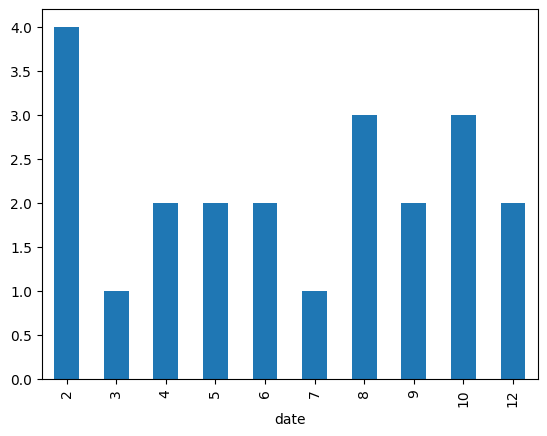

In [356]:
#merged_kr_df.info()

merged_kr_df.date.dt.month.value_counts().sort_index().plot(kind='bar')




### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

                                                title  year          name  \
0                                      Priest of Love  1981  Ian McKellen   
1                                            The Keep  1983  Ian McKellen   
2                                              Plenty  1985  Ian McKellen   
3                                             Scandal  1989  Ian McKellen   
4                             The Ballad of Little Jo  1993  Ian McKellen   
5                           Six Degrees of Separation  1993  Ian McKellen   
6                                    Last Action Hero  1993  Ian McKellen   
7                                          To Die For  1994  Ian McKellen   
8                                          The Shadow  1994  Ian McKellen   
9                                    I'll Do Anything  1994  Ian McKellen   
10                                        Restoration  1995  Ian McKellen   
11                                        Richard III  1995  Ian McKellen   

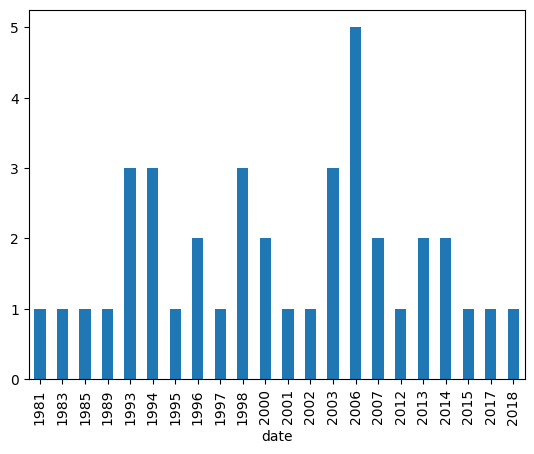

In [363]:
im_c_df = cast[cast.name == 'Ian McKellen'].sort_values(by=['year'], ascending=True)
im_m_df = release_dates[release_dates.country == 'USA'].sort_values(by=['date'], ascending=True)

im_merged_df = pd.merge(im_c_df, im_m_df, on=['title', 'year'])

im_merged_df.date.dt.year.value_counts().sort_index().plot(kind='bar')

print(im_merged_df)